In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [3]:
df = pd.read_csv("Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [7]:
df.dropna(inplace=True)

In [8]:
df['UnitPrice'].min(), df['UnitPrice'].max()

(0.0, 38970.0)

Here we calculate the monthly revenue and plot it over time.

In [9]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Revenue']


0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 406829, dtype: float64

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [12]:
monthly_revenue = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue

,Year,Month,Revenue
0,2010,1,46051.260
1,2010,2,45775.430
2,2010,3,22598.460
3,2010,5,31380.600
4,2010,6,30465.080
5,2010,7,53125.990
6,2010,8,38048.680
7,2010,9,37177.850
8,2010,10,32005.350
9,2010,12,217975.320


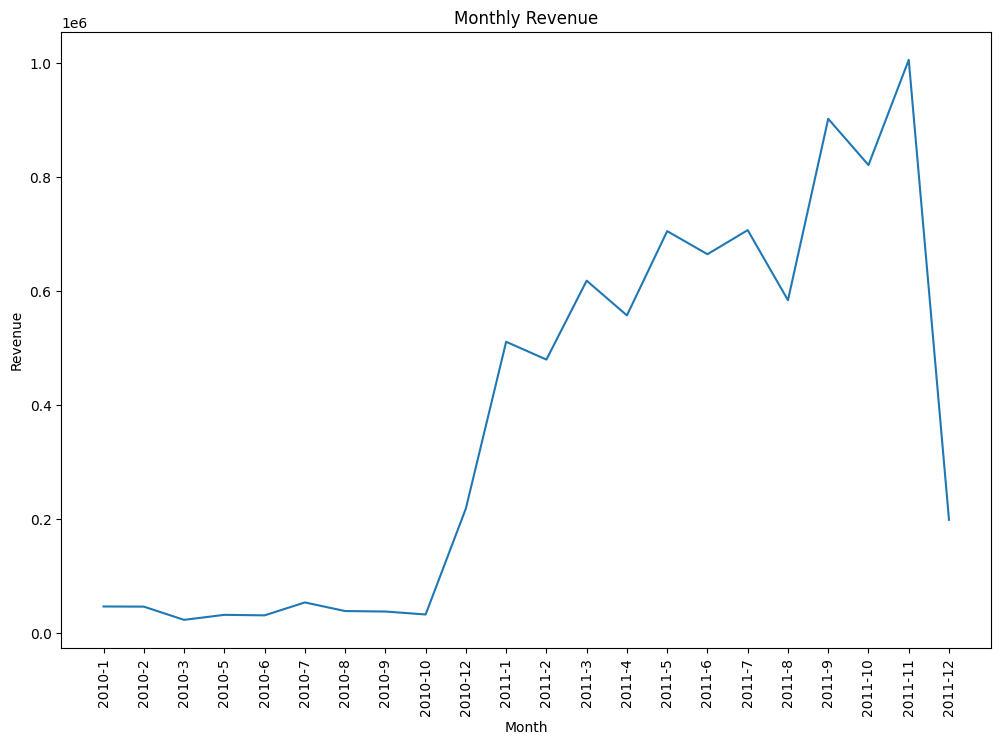

In [13]:
plt.figure(figsize=(12,8))
plt.plot(monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'])
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

The monthly revenue shows a seasonal pattern, with peaks in November and December, indicating high demand during the holiday season.

Here we find the top 10 products by sales value and plot them on a bar chart which helps to identify the best-selling and most profitable products.

In [14]:
product_sales = df.groupby('Description')['Revenue'].sum().reset_index()
product_sales = product_sales.sort_values(by='Revenue', ascending=False)

In [15]:
top_10_products = product_sales.head(10)
top_10_products

,Description,Revenue
2780,REGENCY CAKESTAND 3 TIER,132870.40
3716,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1771,JUMBO BAG RED RETROSPOT,83236.76
2355,PARTY BUNTING,67687.53
2624,POSTAGE,66710.24
217,ASSORTED COLOUR BIRD ORNAMENT,56499.22
2669,RABBIT NIGHT LIGHT,51137.80
725,CHILLI LIGHTS,45936.81
2323,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48
2405,PICNIC BASKET WICKER 60 PIECES,39619.50


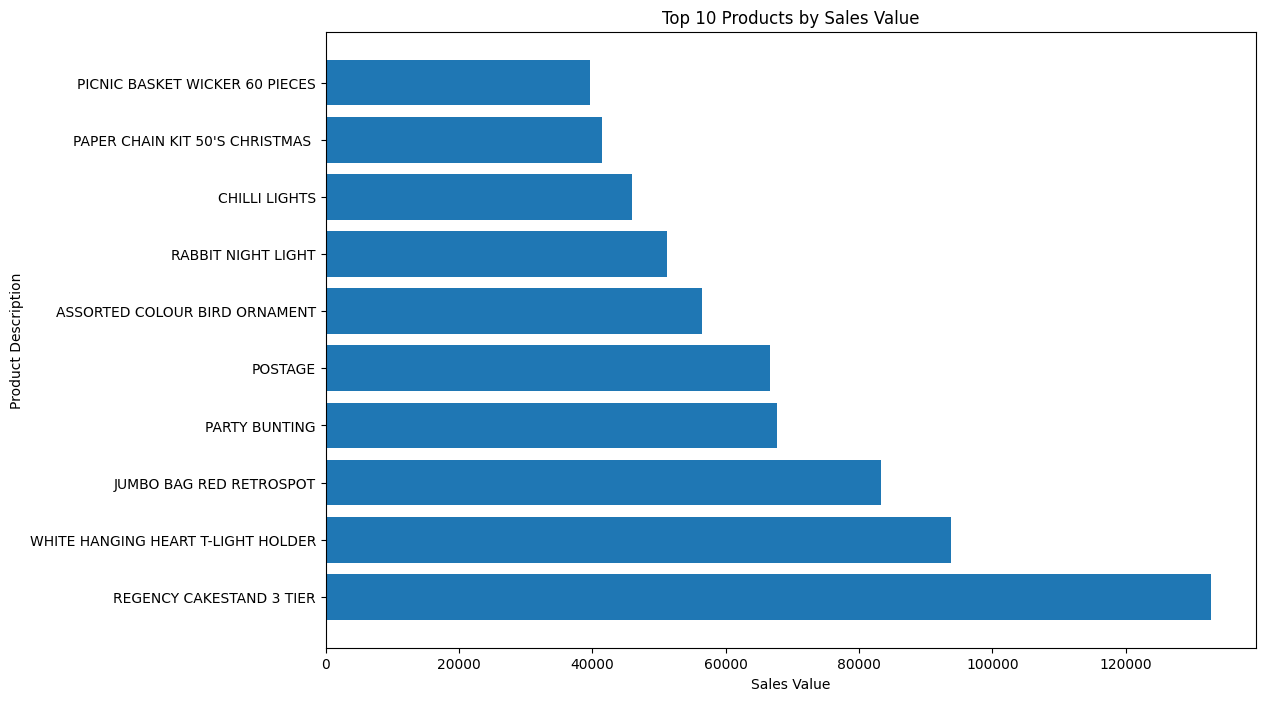

In [16]:
plt.figure(figsize=(12,8))
plt.barh(top_10_products['Description'], top_10_products['Revenue'])
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Sales Value')
plt.ylabel('Product Description')
plt.show()